In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


In [3]:
#clear Nan
dfLE.dropna(axis=0, inplace=True)

<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [4]:
#Part 1
#Assum GDP in million
dfLE["GdpPerCapita"]= dfLE["GDP"] / dfLE["Population"]

In [5]:
df_gdp = dfLE[["Country", "GdpPerCapita"]]
df_gdp.sample(10)

,Country,GdpPerCapita
103,Mali,571.797607
134,Portugal,10749.159279
184,Uzbekistan,554.092681
72,Haiti,451.267649
167,Tajikistan,363.500312
18,Bhutan,1497.154333
61,Gabon,5471.491381
115,Namibia,2612.830554
76,India,692.150781
17,Benin,385.922328


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

In [6]:
def bigGraph(df_in, columnName):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data), 1)
    pmf = thinkstats2.Pmf(round(data), 1)
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data) 

    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.SubPlot(1, title="Hist")
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2, title="PMF")
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3, title="CDF")
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4, title="Prob Plot")
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5, title="Log PP")
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6, title="PDF")
    thinkplot.Pdf(pdf)
    
    thinkplot.Config()
    return

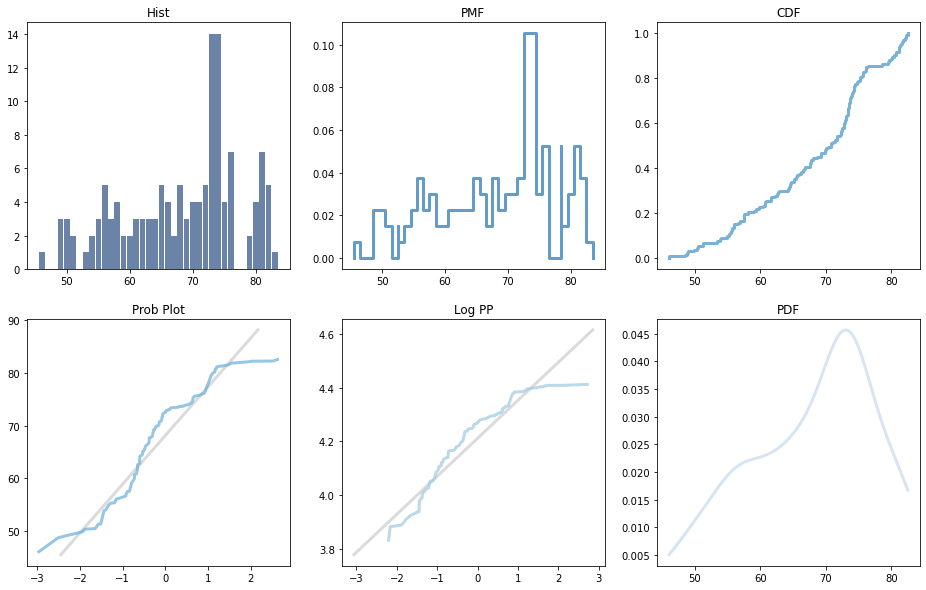

In [7]:
bigGraph(dfLE, "Lifeexpectancy")

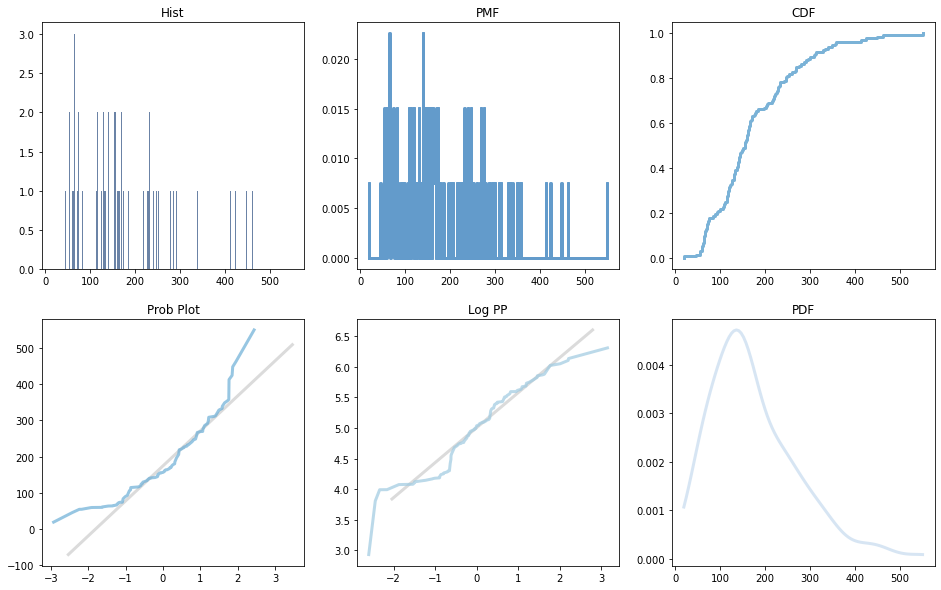

In [8]:
bigGraph(dfLE, "AdultMortality")

d:\Program\anaconda3\envs\backup_env\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\denni\Desktop\DATA AN\BSIP_Assignment_2_Students\thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


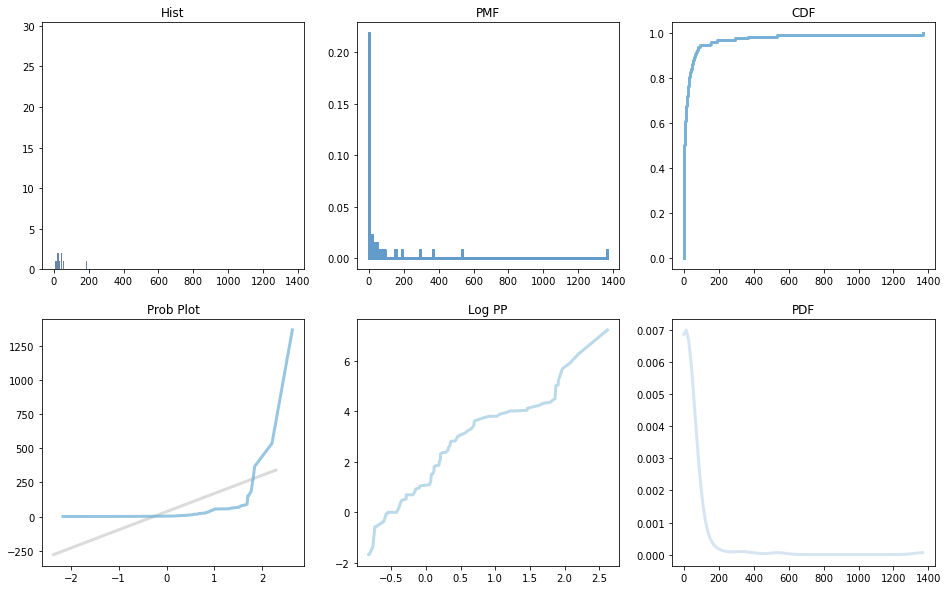

In [9]:
bigGraph(dfLE, "infantdeaths")

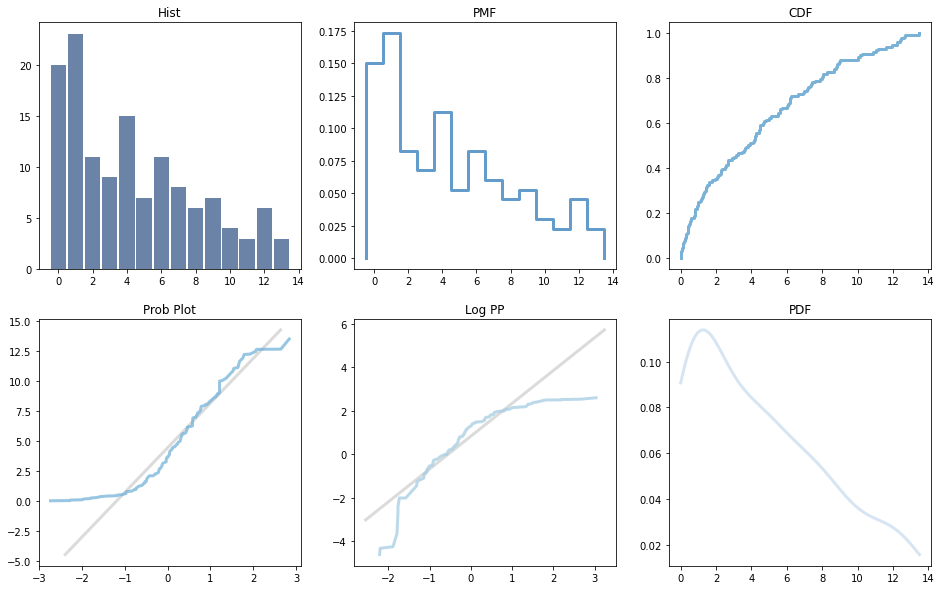

In [10]:
bigGraph(dfLE, "Alcohol")

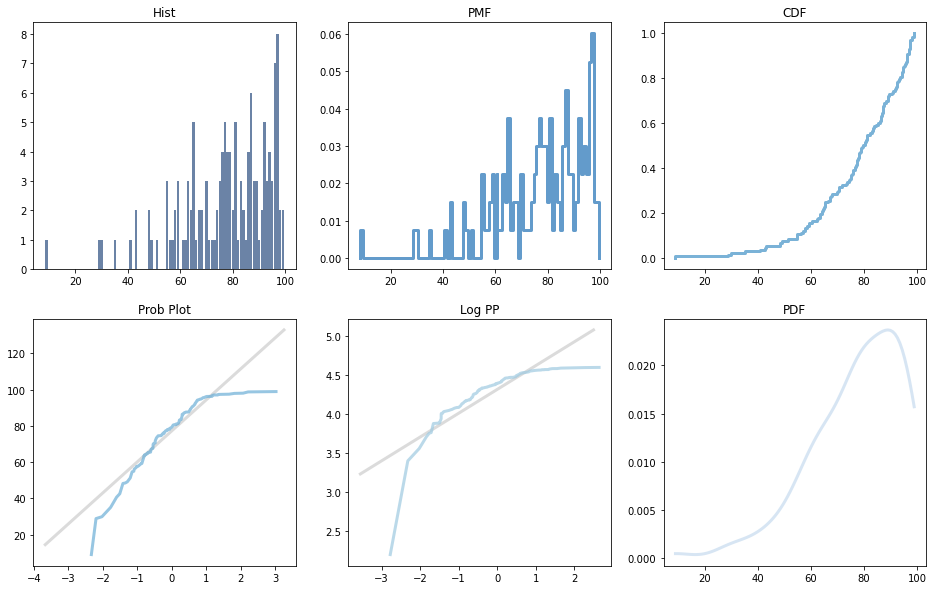

In [11]:
bigGraph(dfLE, "HepatitisB")

d:\Program\anaconda3\envs\backup_env\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\denni\Desktop\DATA AN\BSIP_Assignment_2_Students\thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


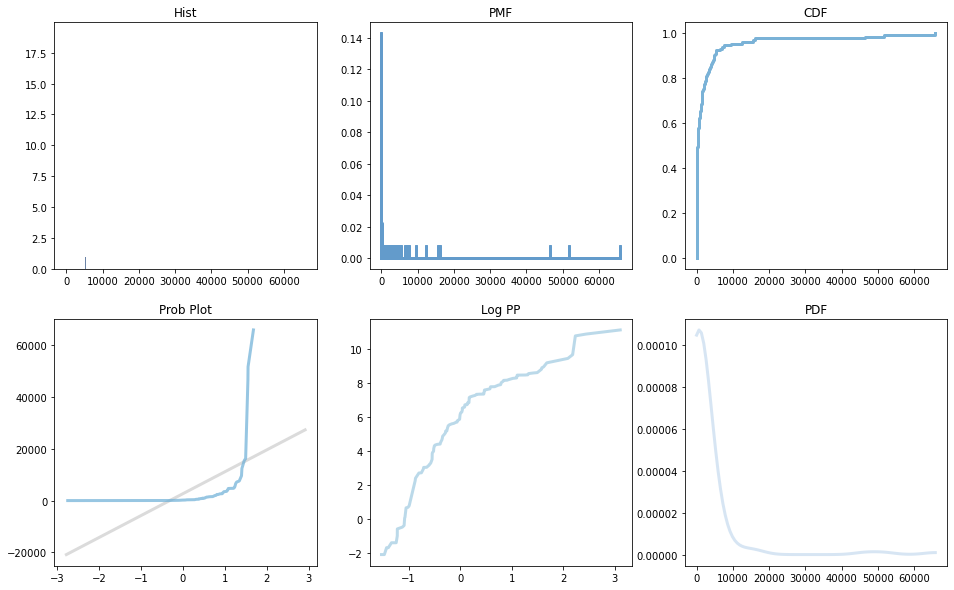

In [12]:
bigGraph(dfLE, "Measles")

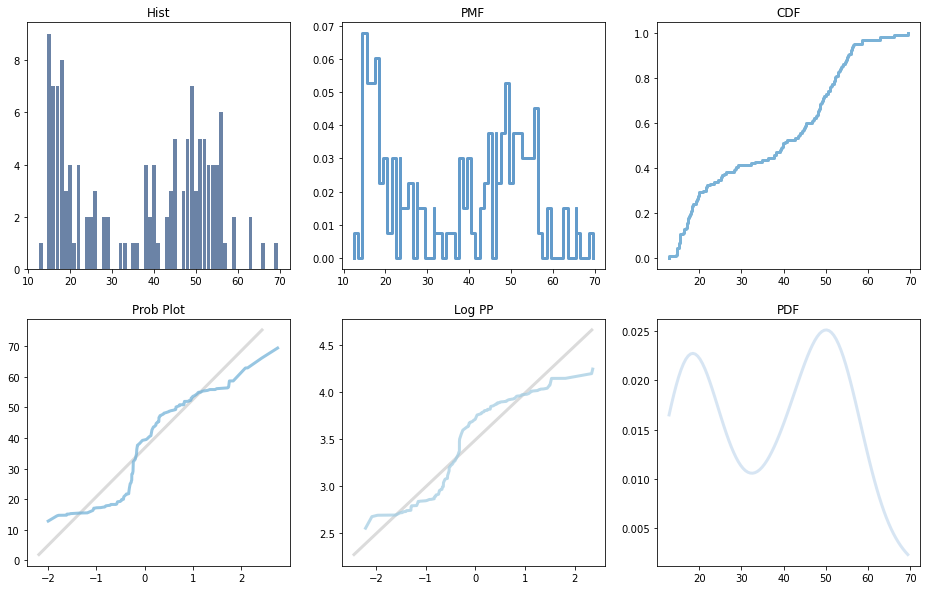

In [13]:
bigGraph(dfLE, "BMI")

d:\Program\anaconda3\envs\backup_env\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\denni\Desktop\DATA AN\BSIP_Assignment_2_Students\thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


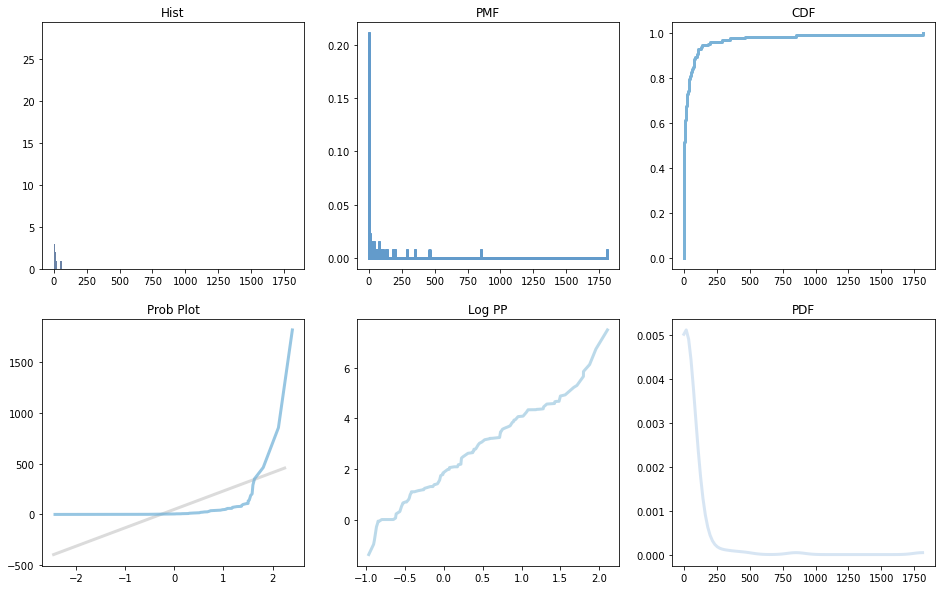

In [14]:
bigGraph(dfLE, "under-fivedeaths")

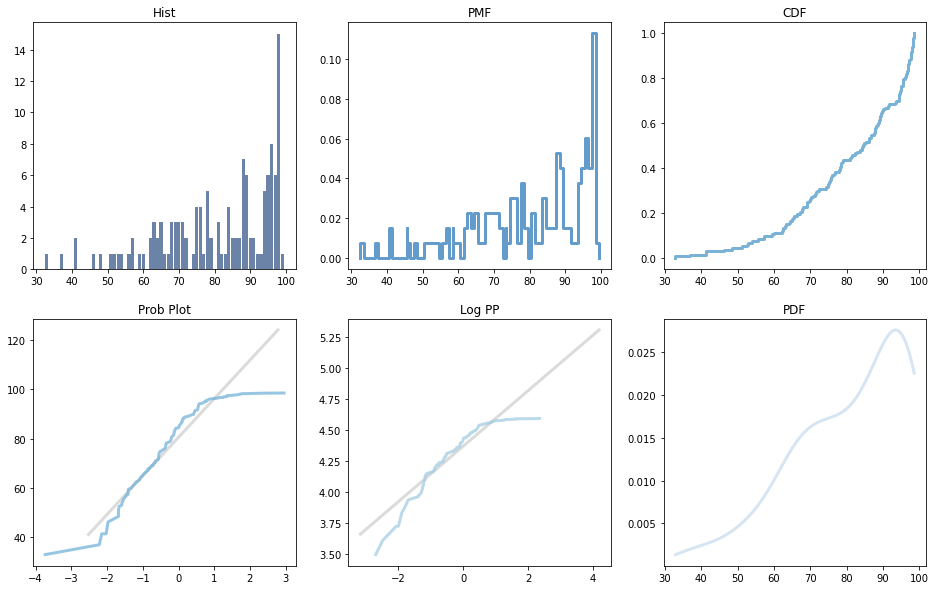

In [15]:
bigGraph(dfLE, "Polio")

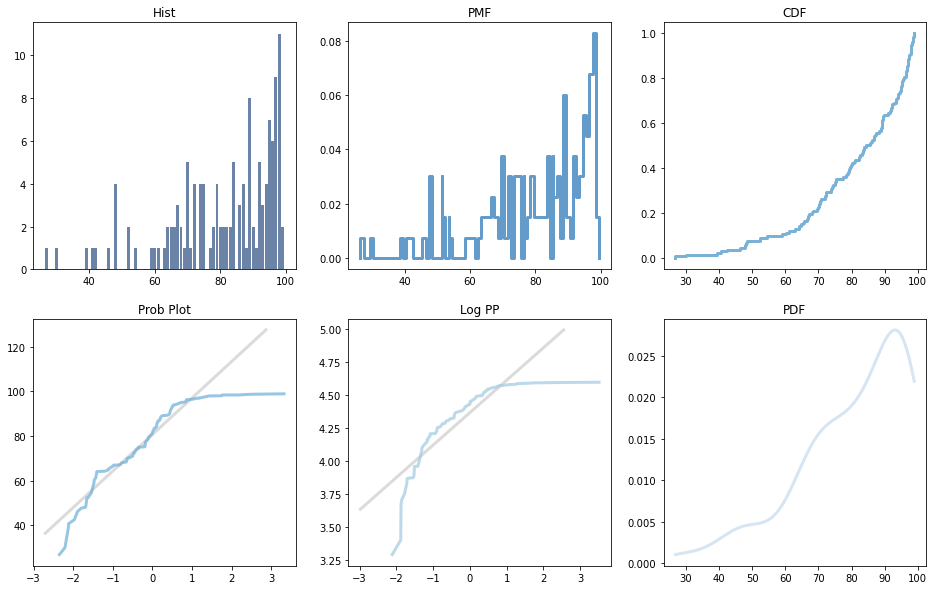

In [16]:
bigGraph(dfLE, "Diphtheria")

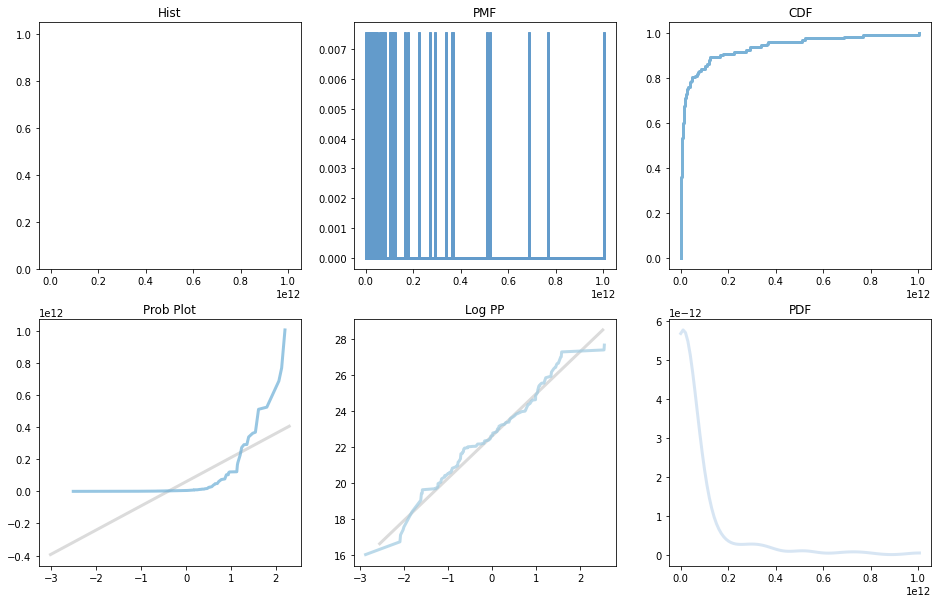

In [17]:
bigGraph(dfLE, "GDP")

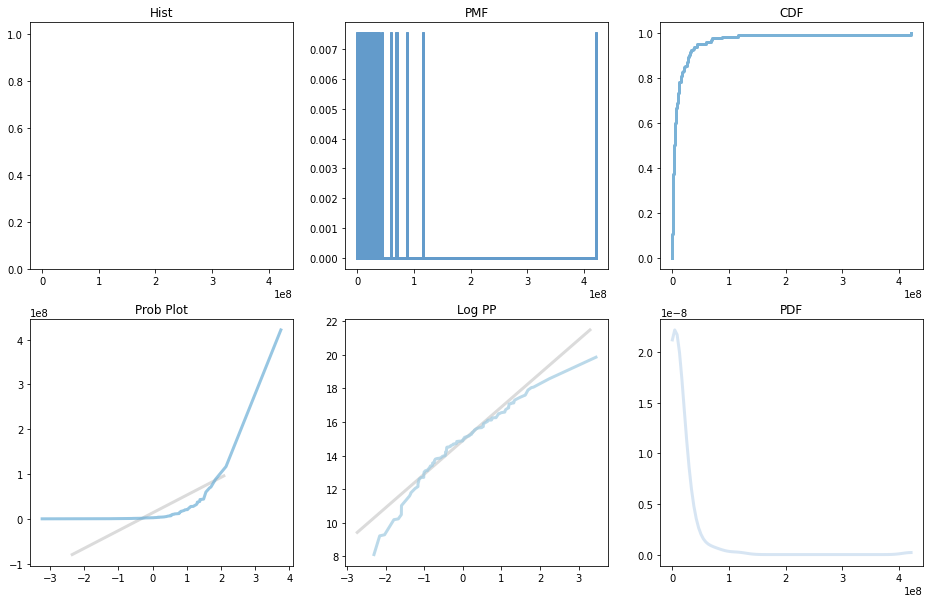

In [18]:
bigGraph(dfLE, "Population")

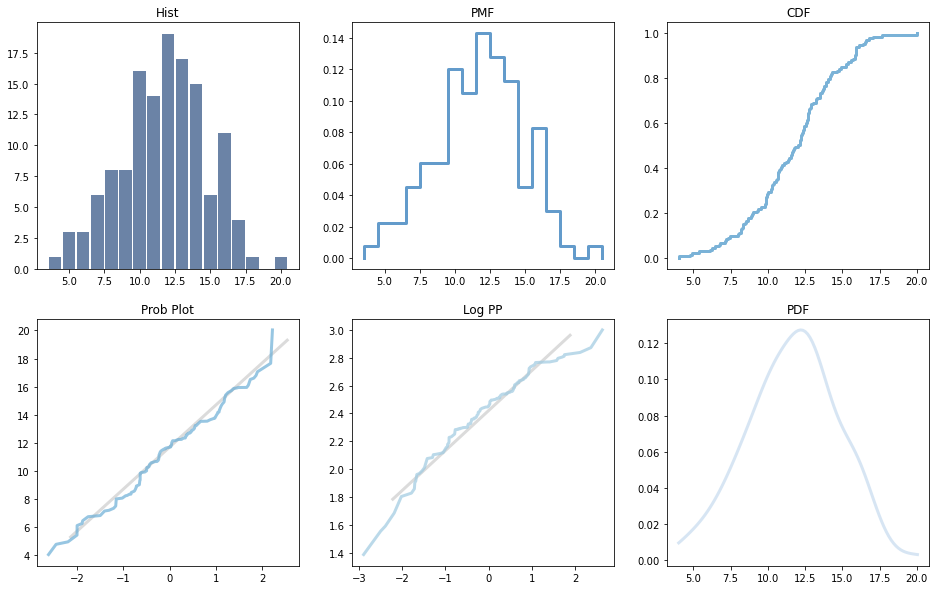

In [19]:
bigGraph(dfLE, "Schooling")

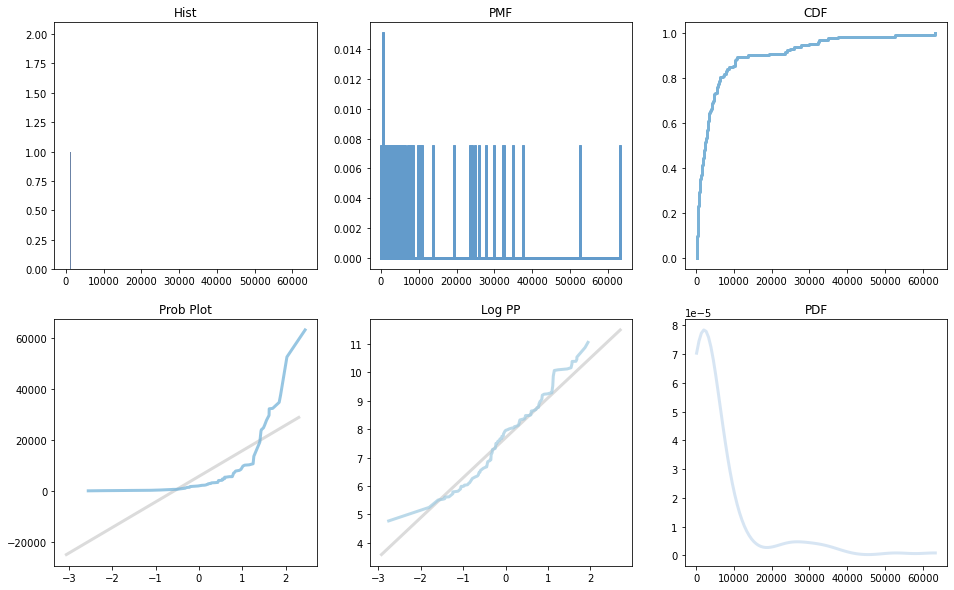

In [20]:
#Print all distributions
bigGraph(df_gdp, "GdpPerCapita")

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

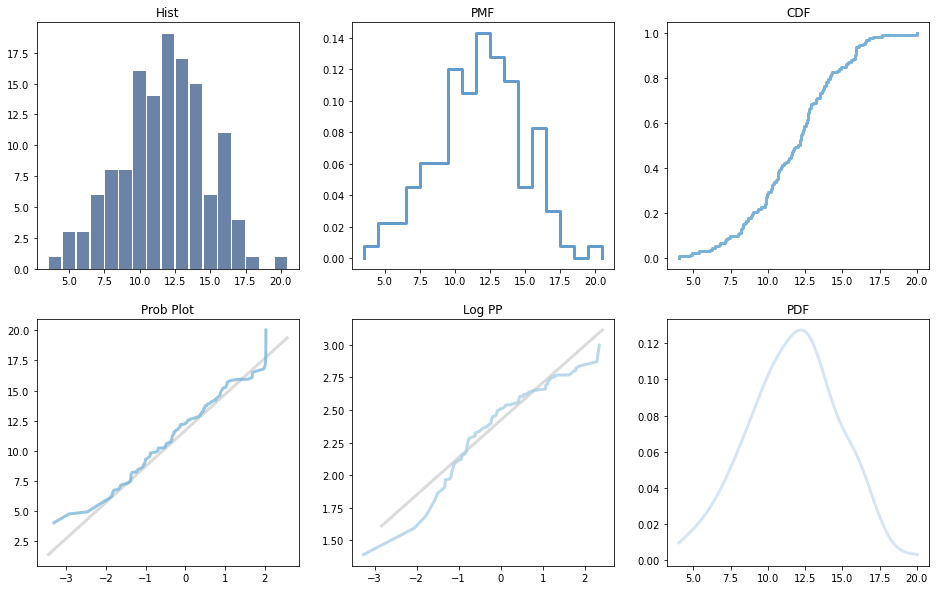

In [21]:
#Plot some graph use the bigGraph funtion
bigGraph(dfLE, "Schooling")

In [22]:
#Analytical for Schooling
k2, p = ss.normaltest(dfLE["Schooling"])
p

0.8061408621435778

From graphs our data looks normally distributed. 
Also, after normality test. The p > 0.05, so we accept the null hypothesis that the data is normal distribution.

### 10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 

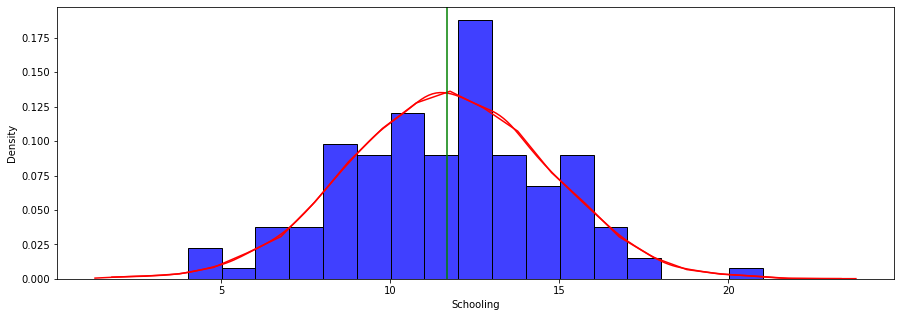

In [23]:
sch_mu = dfLE["Schooling"].mean()
sch_sigma = dfLE["Schooling"].std()
norm_sch = ss.norm(sch_mu, sch_sigma)
sns.histplot(data=norm_sch.rvs(10000), binwidth=1, color="red", stat="density", kde=True, element="poly", fill=False)
sns.histplot(data=dfLE["Schooling"], binwidth=1, color="blue", stat="density")
plt.axvline(sch_mu, color="green")

### 5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 

In [24]:
df_canada = [dfLE[dfLE["Country"]=="Canada"]]
df_canada


[   Country  isDeveloped  Lifeexpectancy  AdultMortality  infantdeaths  \
 30  Canada          0.0         81.6875          64.625           2.0   
 
      Alcohol  HepatitisB  Measles      BMI  under-fivedeaths    Polio  \
 30  8.053333   28.846154    129.5  55.8625               2.0  85.3125   
 
     Diphtheria           GDP    Population  Schooling  GdpPerCapita  
 30     91.0625  3.384881e+11  1.136405e+07     15.875  29785.859548  ]

In [25]:
# Canada schooling is 15.875
predict_pre = norm_sch.cdf(15.875+1)-norm_sch.cdf(15.875-1)
predict_pre

0.1024974868286832

Using the distribution, there has 10.25% of our data have a schooling level within 1 year of Canada.

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

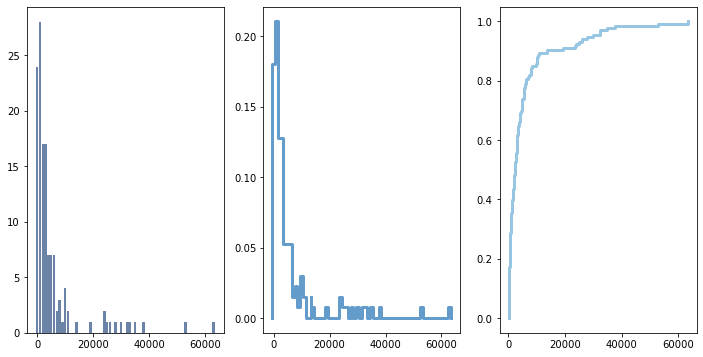

In [26]:
#Analytical for GDP/capita
gpc_hist = thinkstats2.Hist(round(dfLE["GdpPerCapita"], -3))
gpc_cdf = thinkstats2.Cdf(dfLE["GdpPerCapita"])
gpc_pmf = thinkstats2.Pmf(round(dfLE["GdpPerCapita"], -3))
thinkplot.PrePlot(3, cols=3)
thinkplot.Hist(gpc_hist)
thinkplot.SubPlot(2)
thinkplot.Pmf(gpc_pmf)
thinkplot.SubPlot(3)
thinkplot.Cdf(gpc_cdf)
thinkplot.Config()

We can see that our original data is highky skewed. May need to adding transformation.

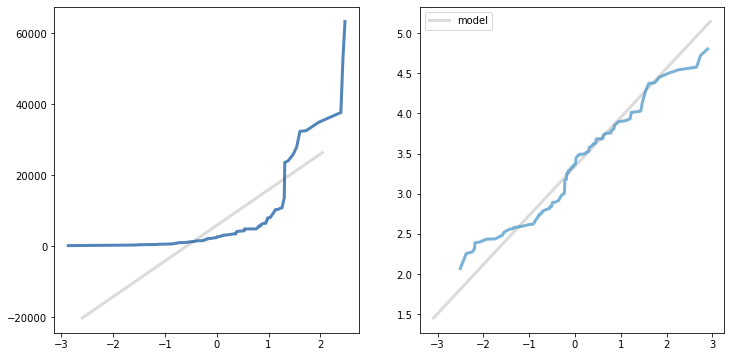

In [27]:
thinkplot.PrePlot(2, cols=2)
thinkstats2.NormalProbabilityPlot(dfLE["GdpPerCapita"])
thinkplot.SubPlot(2)
thinkstats2.NormalProbabilityPlot(np.log10(dfLE["GdpPerCapita"]))
thinkplot.Config()


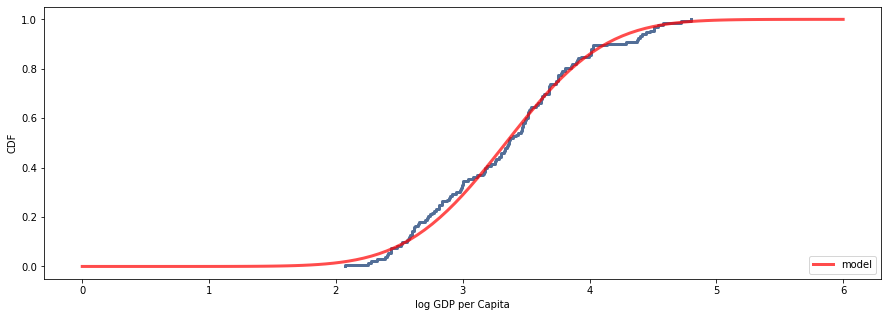

In [28]:
gpc_log=np.log10(dfLE["GdpPerCapita"])
gpc_log_cdf=thinkstats2.Cdf(gpc_log)
mu_lgpc, sigma_lgpc= gpc_log.mean(), gpc_log.std()
xs_lgpc, ps_lgpc=thinkstats2.RenderNormalCdf(mu_lgpc, sigma_lgpc, low=0, high=6)
thinkplot.Cdf(gpc_log_cdf)
thinkplot.Plot(xs_lgpc, ps_lgpc, label='model', color='red')
thinkplot.Config(xlabel='log GDP per Capita', ylabel='CDF', loc='lower right')

In conclusion, our data looks lognormal distribution. However, the data on the high end is little lower and the bottom is little higher than expect with analytical lognormal distribution. It still looks accurate for me, because there will be huge GDP and population different between developed and developing countries.

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [29]:
dfLE2 = dfLE.drop(columns=["Country"])
dfLE2.describe()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GdpPerCapita
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,1.330000e+02,1.330000e+02,133.000000,133.000000
mean,0.142857,68.139709,174.300282,35.902726,4.436893,77.272061,2657.467105,36.691964,49.817199,80.572006,80.699919,6.023285e+10,1.340066e+07,11.691823,5831.130877
std,0.351250,9.254200,97.065845,133.819254,3.736886,17.174868,8473.612218,15.971021,181.414641,15.732438,16.431339,1.506979e+11,3.972571e+07,3.006460,10101.737928
min,0.000000,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,12.875000,0.000000,32.875000,26.812500,8.988098e+06,3.334250e+03,4.018750,117.466394
25%,0.000000,60.862500,114.312500,0.687500,1.074667,66.500000,15.125000,19.293750,1.000000,69.625000,70.500000,1.213512e+09,1.007302e+06,9.868750,685.958218
50%,0.000000,70.731250,154.312500,3.312500,3.807333,79.600000,251.937500,39.743750,4.000000,84.375000,84.500000,6.161290e+09,3.735507e+06,12.000000,2306.960717
75%,0.000000,74.262500,227.750000,23.250000,7.130000,91.812500,1880.812500,50.893750,35.562500,94.812500,95.000000,2.698236e+10,1.124072e+07,13.725000,5490.517494
max,1.000000,82.518750,550.062500,1366.687500,13.497333,98.875000,65857.937500,69.431250,1812.500000,98.562500,98.937500,1.004677e+12,4.214677e+08,20.037500,63337.610450


In [37]:
#remove outlier
dfLE2 = dfLE2[dfLE2["infantdeaths"] < 200]
dfLE2 = dfLE2[dfLE2["under-fivedeaths"] < 200]
dfLE2 = dfLE2[dfLE2["Measles"] < 40000]
dfLE2 = dfLE2[dfLE2["Population"] < 60000000]


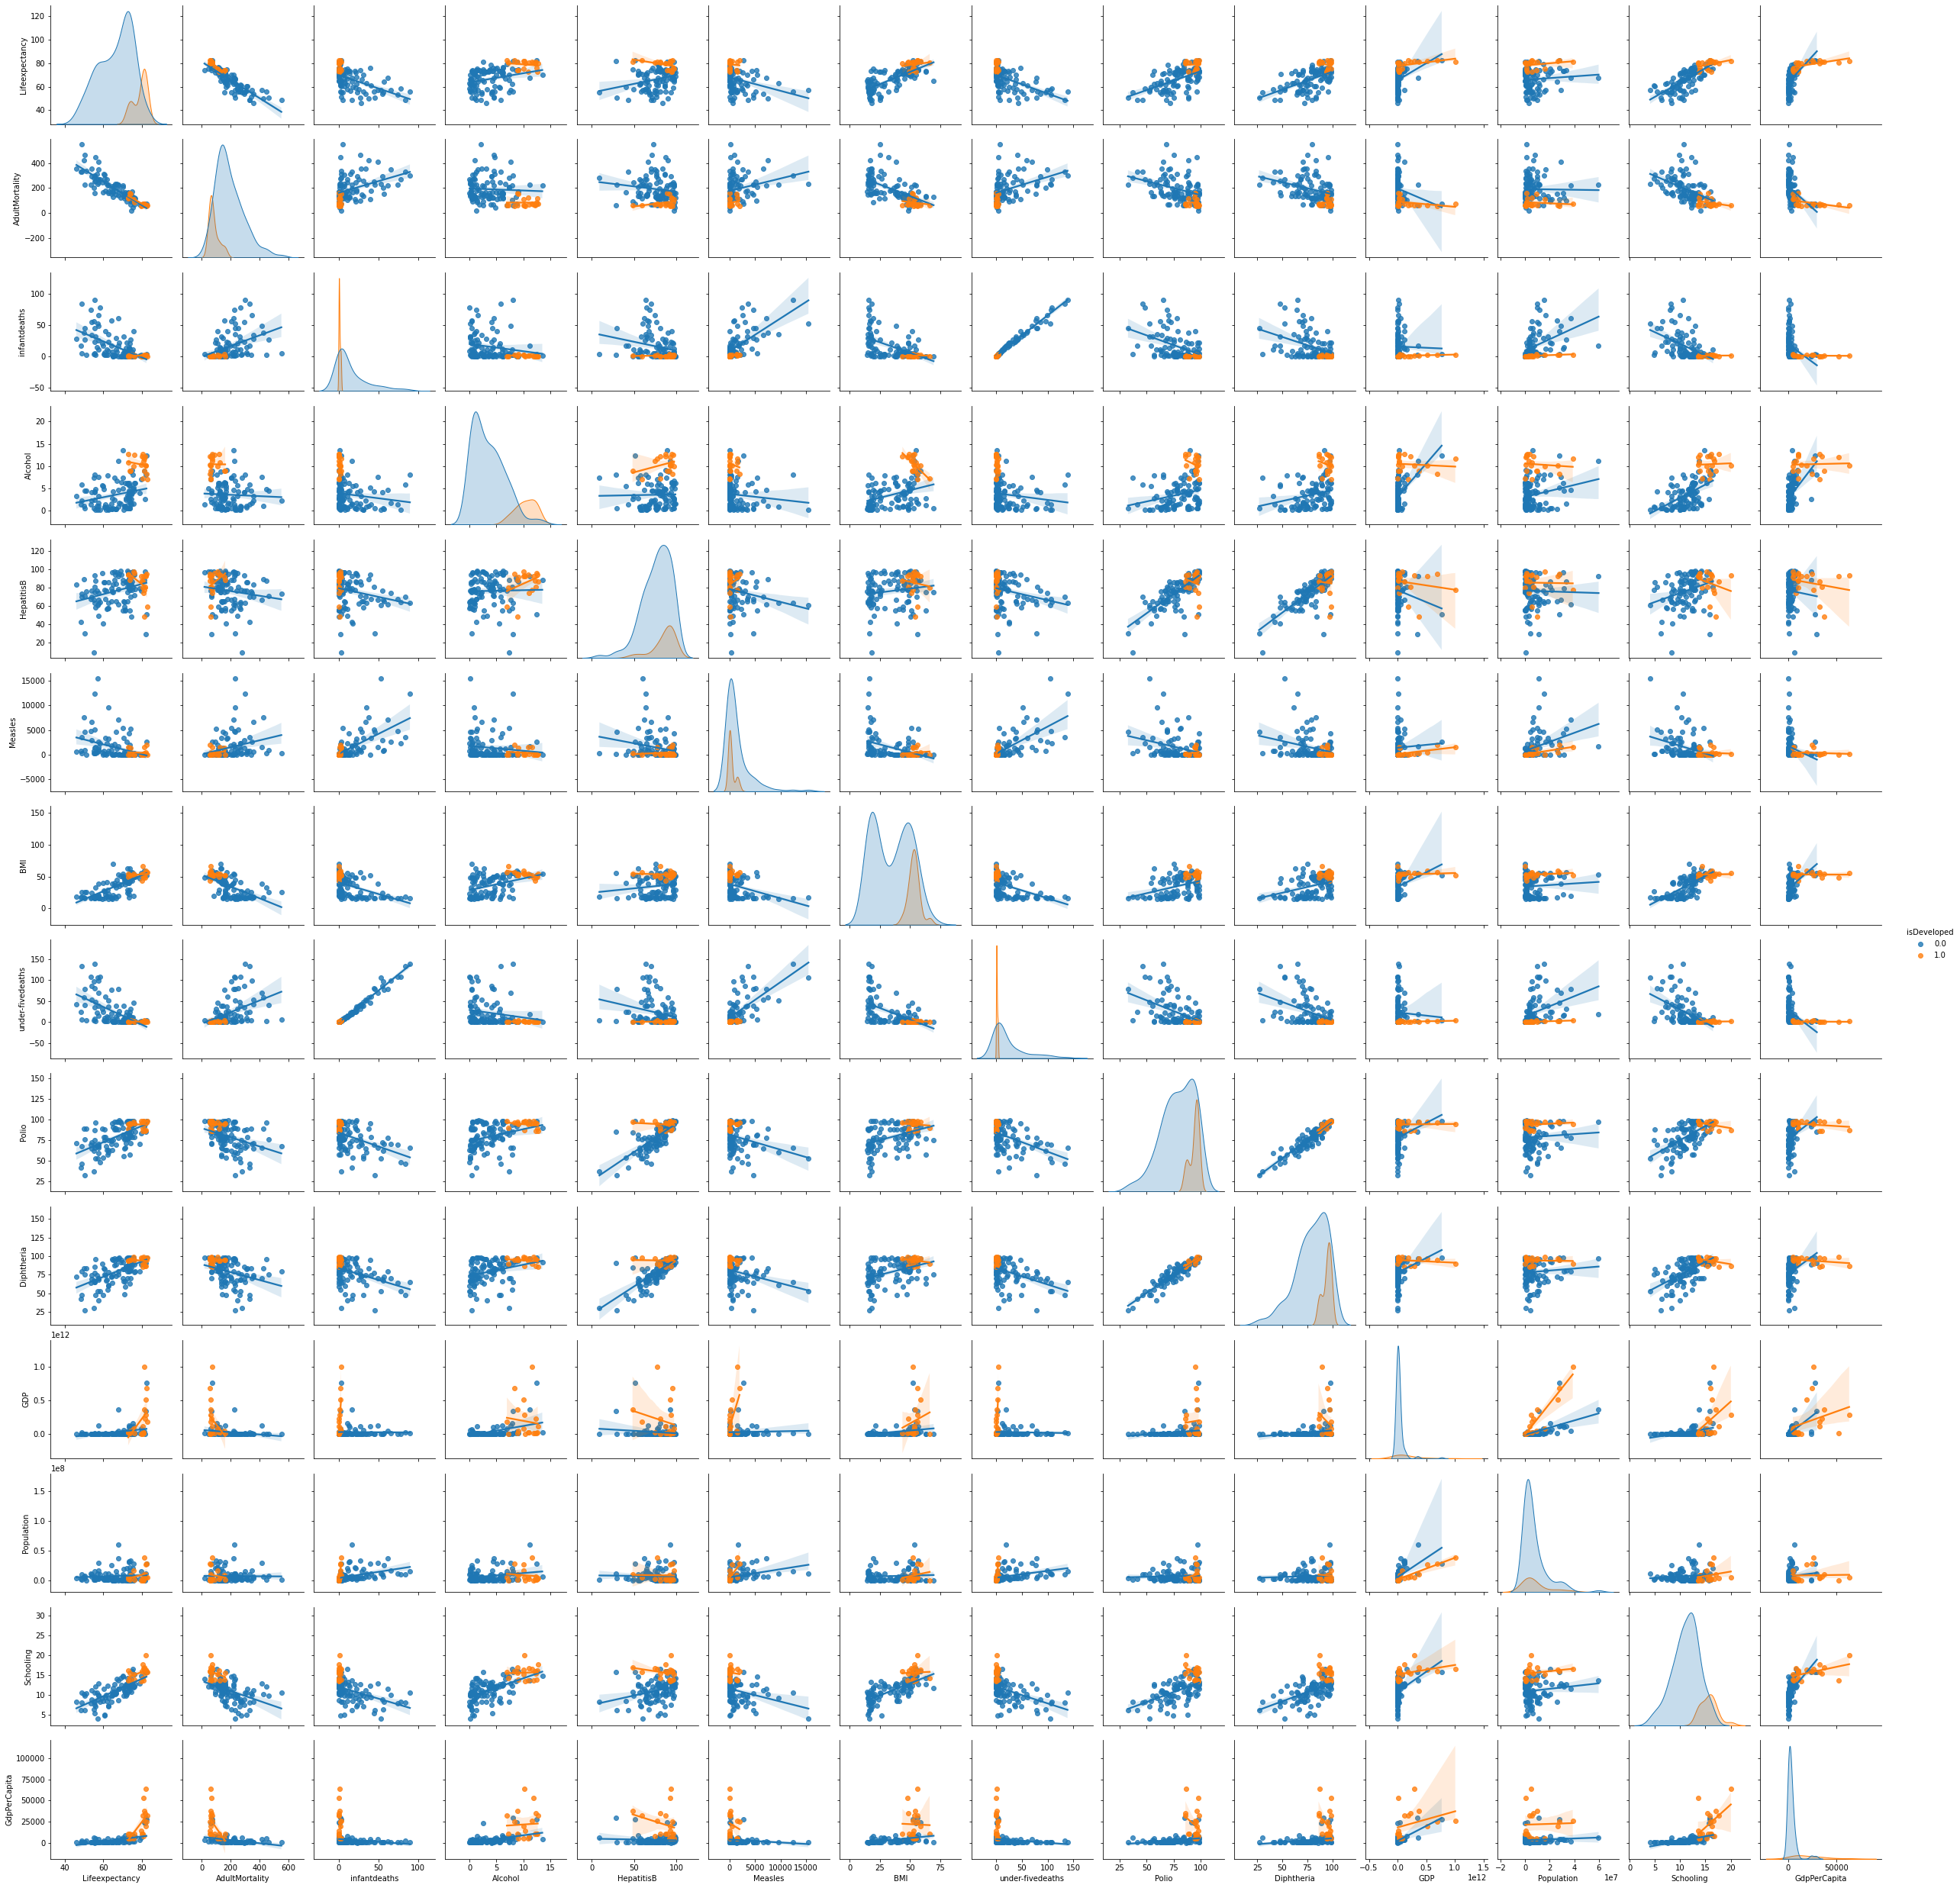

In [38]:
#Generate pairplot
sns.pairplot(dfLE2, dropna=True, kind="reg", hue="isDeveloped")
plt.show()

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [41]:
#correlations for developed countries
dfLE2_corrs= dfLE2.apply(pd.to_numeric, errors='coerce')
dfLE2_corrs_dev= dfLE2_corrs[dfLE2_corrs["isDeveloped"]== 1]
dfLE2_corrs_dev=dfLE2_corrs_dev.drop(columns="isDeveloped")
dfLE2_corrs_dev=dfLE2_corrs_dev.corr()
dfLE2_corrs_dev.head()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GdpPerCapita
Lifeexpectancy,1.000000,-0.899359,-0.057183,-0.171770,-0.444695,-0.086277,0.199851,-0.017819,0.034499,-0.158312,0.490596,0.287785,0.418105,0.620499
AdultMortality,-0.899359,1.000000,0.216727,-0.005333,0.334286,0.178315,-0.165426,0.183252,-0.022663,0.093680,-0.344043,-0.148966,-0.289023,-0.496477
infantdeaths,-0.057183,0.216727,1.000000,-0.221295,0.135308,0.719403,0.157665,0.986796,0.207134,0.049995,0.593179,0.781328,0.085720,-0.119084
Alcohol,-0.171770,-0.005333,-0.221295,1.000000,0.367880,-0.158748,-0.683514,-0.180704,-0.279539,-0.200160,-0.098270,-0.114638,0.045575,0.045979
HepatitisB,-0.444695,0.334286,0.135308,0.367880,1.000000,0.154259,-0.112131,0.122126,-0.160261,-0.053976,-0.200392,-0.019519,-0.261785,-0.247542


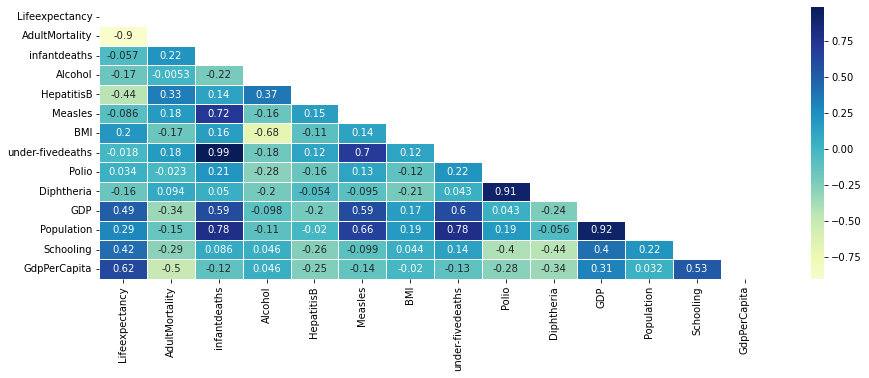

In [42]:
mask = np.triu(np.ones_like(dfLE2_corrs_dev, dtype=bool))
sns.heatmap(dfLE2_corrs_dev, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

The 3 strongest correlations with life expectancy for developed countries is: GDP Per Capita , HepatitisB, Adult Mortality

In [44]:
#correlations for not developed countries
dfLE2_corrs_notdev= dfLE2_corrs[dfLE2_corrs["isDeveloped"]== 0]
dfLE2_corrs_notdev=dfLE2_corrs_notdev.drop(columns="isDeveloped")
dfLE2_corrs_notdev=dfLE2_corrs_notdev.corr()
dfLE2_corrs_notdev.head()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GdpPerCapita
Lifeexpectancy,1.000000,-0.859125,-0.543482,0.263546,0.288833,-0.340111,0.731037,-0.579758,0.564523,0.565048,0.299017,0.084595,0.733738,0.520247
AdultMortality,-0.859125,1.000000,0.399259,-0.050039,-0.145997,0.265197,-0.586394,0.419344,-0.352371,-0.319423,-0.182412,-0.014931,-0.465321,-0.358840
infantdeaths,-0.543482,0.399259,1.000000,-0.163331,-0.232751,0.650253,-0.497965,0.989826,-0.455774,-0.410212,-0.018522,0.434099,-0.469504,-0.275576
Alcohol,0.263546,-0.050039,-0.163331,1.000000,0.021144,-0.113566,0.354345,-0.164370,0.276159,0.270216,0.461961,0.228612,0.532897,0.492110
HepatitisB,0.288833,-0.145997,-0.232751,0.021144,1.000000,-0.214091,0.152126,-0.247699,0.767336,0.780199,-0.138439,-0.026356,0.305570,-0.066665


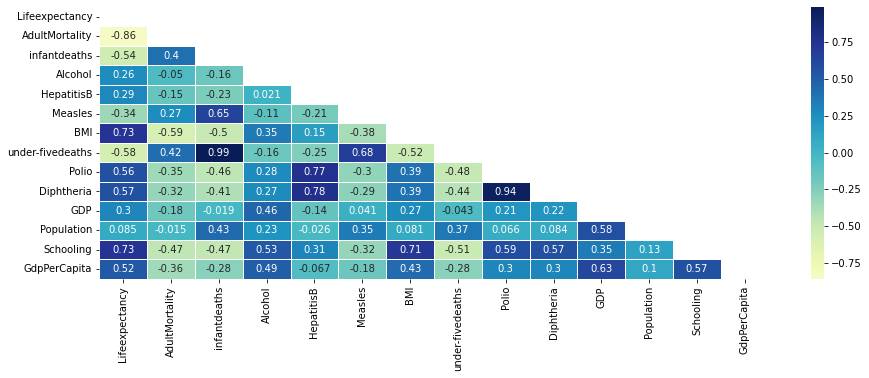

In [45]:
mask = np.triu(np.ones_like(dfLE2_corrs_notdev, dtype=bool))
sns.heatmap(dfLE2_corrs_notdev, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

The 3 strongest correlations with life expectancy for not developed countries is: BMI , Schooling, Adult Mortality